# Pre-Processing of Titanic Data

#  1 Load Data and Inspect

In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv('AI-MLData/titanic.csv')
df.info()
#df.duplicated()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 2 Check the Categorical and Numerical Columns.

In [6]:
# Categorical Columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)


Categorical columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [8]:
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)


Numerical columns : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [11]:
# Check the total number of Unique Values in the Categorical Columns
df.nunique()
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [13]:
# Removal of all Above Unwanted Observations
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [15]:
# Drop name and Ticket columns
df1=df.drop(['Name','Ticket'],axis=1)


df1.columns

df1.shape

# 3 Identify & Handle Missing Value

In [17]:
round((df1.isnull().sum()/df1.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

# Drop Missing Value
# Or replace

it’s not a good idea to fill 77% of null values. So, we will drop the Cabin column. Embarked column has only 0.22% of null values so, we drop the null values rows of Embarked column.

In [19]:
df2 = df1.drop(columns='Cabin')
df2.dropna(subset=['Embarked'], axis=0, inplace=True)
df2.shape


(889, 9)

# Imputing the missing values from past observations.

In [22]:
# Mean imputation
df3 = df2.fillna(df2.Age.mean())


In [ ]:
df3.shape

df3.isnull().sum()

# 4 Outlier handling

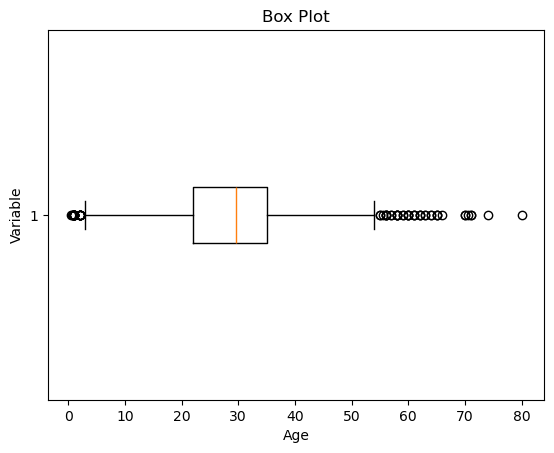

In [24]:
import matplotlib.pyplot as plt
plt.boxplot(df3['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()


As we can see from the above Box and whisker plot, Our age dataset has outliers values. The values less than 5 and more than 55 are outliers.

In [28]:
# calculate summary statistics
mean = df3['Age'].mean()
std  = df3['Age'].std()
# Calculate the lower and upper bounds
lower_bound = mean - std*3
upper_bound = mean + std*3
print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)
# Drop the outliers
df4 = df3[(df3['Age'] >= lower_bound) 
                & (df3['Age'] <= upper_bound)]


Lower Bound : -9.262946186426138
Upper Bound : 68.54713157968457


df4.shape

Similarly, we can remove the outliers of the remaining columns.

# 5 Data Transformation 

normalization, scaling

# Data validation and verification

In [7]:
#X = df4[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
X=df4.drop(['Survived'],axis=1)
Y = df4['Survived']


NameError: name 'df4' is not defined

Common scaling methods include Min-Max scaling and Standardization (Z-score scaling).

Min-Max Scaling: Min-Max scaling rescales the values to a specified range, typically between 0 and 1. It preserves the original distribution and ensures that the minimum value maps to 0 and the maximum value maps to 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
#num_col_ = [col for col in X.columns if X[col].dtype != 'object']
num_col=X.columns
x1 = X
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()


#Standardization (Z-score scaling) can also be used